<a href="https://colab.research.google.com/github/ChrisHallak/MNIST-handwritten-digit-recognition/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [1]: Import necessary libraries


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## [2]: Dataset Acquisition


#### MNIST Dataset:
MNIST dataset includes handwritten digits total of 70,000 images consisting of 60,000 examples in training set and 10,000 examples in testing set, both with labeled images from 10 digits (0 to 9).Handwritten digits are images in the form of 28 * 28 gray scale intensities of images.


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# exploring the dataset

print('shape of X_train : ',X_train.shape)
print('shape of y_Train : ',y_train.shape)
print('shape of X_test : ',X_test.shape)
print('shape of y_test : ',y_test.shape)

shape of X_train :  (60000, 28, 28)
shape of y_Train :  (60000,)
shape of X_test :  (10000, 28, 28)
shape of y_test :  (10000,)


## [3]: Data Preprocessing



In [ ]:
# Normalization
# Images are normalized to the range [0, 1] using the normalize function.
# Normalization is crucial for ensuring that the input features have similar scales,
# which can improve the convergence and performance of machine learning algorithms.

X_train = normalize(X_train)
X_test = normalize(X_test)



In [ ]:
# Convert labels to one-hot encoding
# Labels are converted into one-hot encoded vectors using the to_categorical function.
# One-hot encoding is essential for classification tasks,
# as it transforms categorical labels into a format that is suitable for training machine learning models.

y_train_one_hot = to_categorical(y_train)
y_test_one_hot =  to_categorical(y_test)

# print some label before and after converting
print('Before ======> After')
print('--------------------')
print(y_train[0],"     ======>" ,y_train_one_hot[0])
print(y_train[1],"     ======>" ,y_train_one_hot[1])
print(y_train[2],"     ======>" ,y_train_one_hot[2])


Before ======> After
--------------------
5      ======> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0      ======> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4      ======> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## [4]:  Exploratory Data Analysis (EDA)


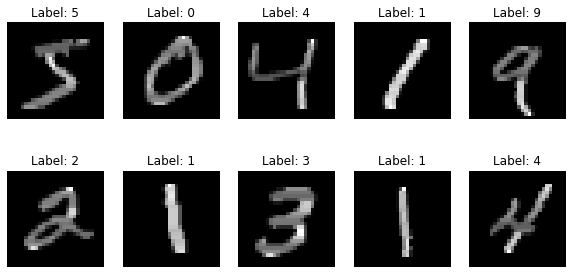

In [ ]:
# Display a few random images from the MNIST dataset

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

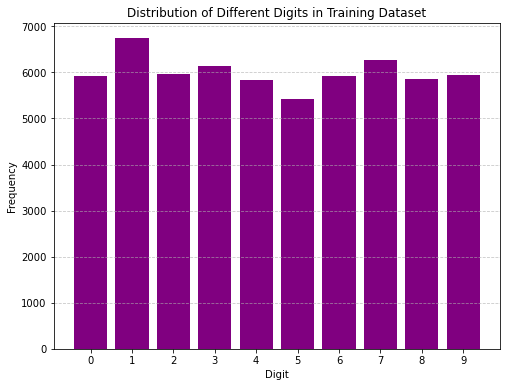

In [ ]:
# distribution of classes in the dataset is essential for
# assessing class balance and potential biases in the data.

digit_counts = np.bincount(y_train)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(range(10), digit_counts, color='purple')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Different Digits in Training Dataset')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### we notice the dataset is balanced
#### Machine learning models trained on a balanced dataset have an equal opportunity to learn
#### patterns and features from each class.This helps prevent biases toward specific classes and
#### ensures that the model learns to generalize well across all classes.

# [5]: Model Selection and Training


## 1 - Logistic Regression


In [ ]:
# Reshape the data
X_train_lg = X_train.reshape(X_train.shape[0],-1)
X_test_lg = X_test.reshape(X_test.shape[0],-1)


In [ ]:
# Create logistic regression model
lg_model = LogisticRegression(max_iter=100)

# Train the model
lg_model.fit(X_train_lg, y_train)

# Predict on the test set
y_pred = lg_model.predict(X_test_lg)

# Calculate accuracy
lg_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model is :", lg_accuracy)

#add result to the final results
results = {}
results['Logistic Regression'] = lg_accuracy


Accuracy of Logistic Regression model is : 0.9298


## - Evaluation Logistic Regression


In [ ]:
# Print the confusion matrix
print("Confusion Matrix for Logistic Regression Model:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix for Logistic Regression Model:
[[ 963    0    2    3    0    2    7    2    1    0]
 [   0 1112    3    3    0    1    3    1   12    0]
 [   8   11  932   12   10    4    9   12   28    6]
 [   2    0   19  937    2   18    2   10   12    8]
 [   2    2    7    2  900    1    8    5   12   43]
 [   8    6    3   33    6  789   16    5   21    5]
 [  10    3    6    2    6    9  918    1    3    0]
 [   0    8   22   10    8    1    0  945    2   32]
 [   6    6    7   18   12   17   12    4  880   12]
 [   6    7    3   10   31    8    0   15    7  922]]


In [ ]:
# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.93      0.92      1010
           4       0.92      0.92      0.92       982
           5       0.93      0.88      0.91       892
           6       0.94      0.96      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.90      0.90       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------
## Expanation of the result:
### Accuracy: 93%
### The model performed reasonably well across most digits.
### Digits like 0, 1, 6, and 7 were classified with high precision and recall.
### However, it struggled a bit with digits like 2, 3, and 8, where precision and recall were relatively lower.
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2 - K-nearest neighbour


In [ ]:
# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_model.fit(X_train_lg, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_lg)


# Calculate accuracy
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of KNN model is :", knn_accuracy)

#add model result to the final results
results['KNN'] = knn_accuracy



Accuracy of KNN model is : 0.967


In [ ]:

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1130    1    1    2    0    1    0    0    0]
 [  10    4  999    2    1    0    2    9    4    1]
 [   3    1    5  975    0   12    0    4    7    3]
 [   2   10    1    0  927    0    7    3    2   30]
 [   7    1    0    9    2  857    9    1    1    5]
 [   6    4    0    0    0    2  945    0    1    0]
 [   1   22    2    0   10    0    0  966    0   27]
 [  12    1    3    9    2    2    5    3  934    3]
 [   7    5    2   10    8    3    0   11    3  960]]


In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       980
           1       0.96      1.00      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.94      0.96       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.94      0.95      1028
           8       0.98      0.96      0.97       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------
## Expanation of the result:
### Accuracy: 97%
### The KNN model achieved high accuracy across all digits.
### It performed particularly well in correctly classifying digits 0, 1, 2, and 6.
### Some confusion was observed between digits 4, 5, and 9, as indicated by slightly lower precision and recall values.
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3 - CNN (Convolution Neural Network)


In [ ]:

# Reshape the data for CNN models
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)


X_train_cnn, X_val_cnn, y_train_one_hot, y_val_one_hot = train_test_split(X_train_cnn, y_train_one_hot, test_size=0.1, random_state=42)


cnn_model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_one_hot, batch_size=128, epochs=5, validation_data=(X_val_cnn, y_val_one_hot))
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_one_hot)

Epoch 1/5
422/422 [==============================] - 13s 30ms/step - loss: 0.3072 - accuracy: 0.9117 - val_loss: 0.1208 - val_accuracy: 0.9672
Epoch 2/5
422/422 [==============================] - 11s 26ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 0.0736 - val_accuracy: 0.9788
Epoch 3/5
422/422 [==============================] - 12s 28ms/step - loss: 0.0615 - accuracy: 0.9821 - val_loss: 0.0626 - val_accuracy: 0.9802
Epoch 4/5
422/422 [==============================] - 12s 28ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9829


In [ ]:
print("Accuracy of CNN model is :", cnn_accuracy[1])
results['CNN'] = cnn_accuracy[1]


Accuracy of CNN model is : 0.9829000234603882


In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


## - Evaluation CNN Model


In [ ]:
# Predict classes for test set
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)

# Convert one-hot encoded labels back to integers
y_test_int = np.argmax(y_test_one_hot, axis=1)

# Calculate confusion matrix
conf_matrix_cnn = confusion_matrix(y_test_int, y_pred_cnn)

# print confusion matrix
print(conf_matrix_cnn)

[[ 977    0    2    1    0    0    0    0    0    0]
 [   0 1128    1    0    4    0    0    1    1    0]
 [   3    1 1009    6    3    0    0    4    3    3]
 [   0    0    1 1004    0    3    0    0    1    1]
 [   1    0    0    0  979    0    0    0    0    2]
 [   1    0    0   13    0  874    2    0    0    2]
 [  10    3    1    1    8    7  926    0    2    0]
 [   0    1    8    2    5    0    0 1004    2    6]
 [   7    0    6    4    4    1    0    1  943    8]
 [   1    3    0    4   12    1    0    2    1  985]]


In [ ]:
# print classification report
print(classification_report(y_test_int, y_pred_cnn))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.96      1.00      0.98       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Testing CNN Model

True Label: 7
Predicted Label: 7


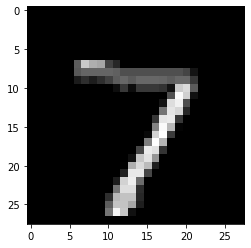

In [ ]:
# Select a single sample from the test set (for example, the first sample)
sample = X_test_cnn[0]
true_label = np.argmax(y_test_one_hot[0])  # Convert one-hot encoded label back to integer

# Reshape the sample to fit the model input shape
sample = sample.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1) to indicate one sample

# Make prediction for the single sample
predicted_probs = cnn_model.predict(sample)
predicted_label = np.argmax(predicted_probs)

# Print the true label and predicted label for the single sample
print("True Label:", true_label)
print("Predicted Label:", predicted_label)

plt.imshow(X_test[0],cmap='gray')
plt.show()

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------
## Expanation of the result:
### Accuracy: 98%
### The CNN model achieved the highest accuracy among the three methods.
### It demonstrated excellent precision and recall values for almost all digits.
### The model performed exceptionally well in distinguishing between different digits, with high precision and recall scores across the board.
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# [6]: Models Comparison


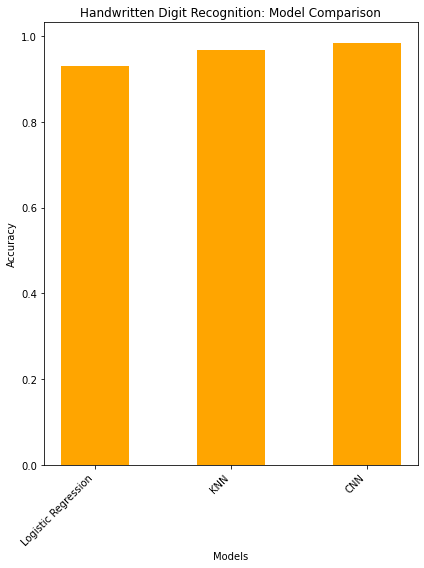

In [ ]:
# Extracting model names and accuracies from the dictionary
model_names = list(results.keys())
accuracies = list(results.values())

# Plotting the bar chart
plt.figure(figsize=(6, 8))
plt.bar(model_names, accuracies, color='orange',width=0.5)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Handwritten Digit Recognition: Model Comparison')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the bar chart
plt.tight_layout()
plt.show()


#### Here's a summary of what we can learn from the confusion matrices and classification reports of the three models:

## What to Learn:
### 1 - Model Performance: The CNN outperformed both Logistic Regression and KNN in terms of accuracy and precision-recall metrics. This suggests that for complex tasks like handwritten digit recognition, more advanced models like CNNs are highly effective.
### 2 - Pattern Recognition: CNNs are specifically designed for image recognition tasks and excel at identifying complex patterns and features within images, which is evident from the superior performance.
### 3 - Consider Model Complexity: While CNNs offer excellent performance, they come with increased computational complexity and resource requirements compared to simpler models like Logistic Regression and KNN. Therefore, the choice of model should consider the trade-offs between performance and computational resources available.
##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------
